In [1]:
import os, sys
from keras.models import Model
from keras.layers import Input, LSTM, GRU, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 64
EPOCHS = 20
LSTM_NODES =256
NUM_SENTENCES = 20000
MAX_SENTENCE_LENGTH = 50
MAX_NUM_WORDS = 20000
EMBEDDING_SIZE = 200

In [3]:
input_sentences = []
output_sentences = []
output_sentences_inputs = []

In [4]:
count = 0
for line in open("C:/Users/ADMIN/Documents/BharatIntern/fra.txt", encoding="utf-8"):
    count += 1
    if count > NUM_SENTENCES:
        break
    if '\t' not in line:
        continue
    input_sentence = line.rstrip().split('\t')[0]
    output = line.rstrip().split('\t')[1]

    output_sentence = output + ' '
    output_sentence_input = ' ' + output

    input_sentences.append(input_sentence)
    output_sentences.append(output_sentence)
    output_sentences_inputs.append(output_sentence_input)

In [5]:
print("Number of sample input:", len(input_sentences))
print("Number of sample output:", len(output_sentences))
print("Number of sample output input:", len(output_sentences_inputs))

Number of sample input: 20000
Number of sample output: 20000
Number of sample output input: 20000


In [6]:
print("English sentence: ",input_sentences[180])
print("French translation: ",output_sentences[180])

English sentence:  Be fair.
French translation:  Soyez honnêtes. 


In [7]:
import pandas as pd

In [8]:
eng_len = []
fren_len = []

In [9]:
for i in input_sentences:
      eng_len.append(len(i.split()))  

for i in output_sentences:
      fren_len.append(len(i.split()))

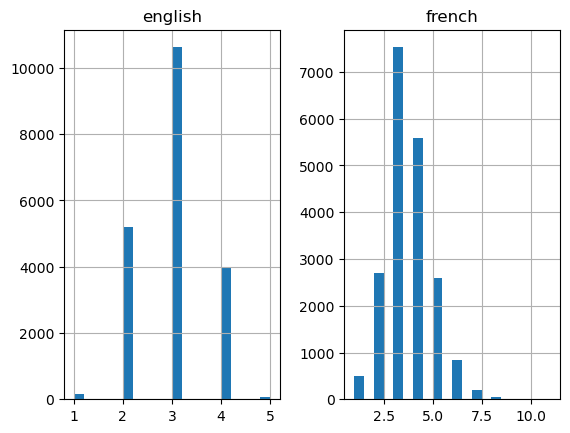

In [10]:
length_df = pd.DataFrame({'english':eng_len, 'french':fren_len})
length_df.hist(bins = 20)
plt.show()

In [11]:
input_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
input_tokenizer.fit_on_texts(input_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(input_sentences)
print(input_integer_seq)

[[17], [17], [17], [17], [553], [553], [122], [122], [122], [122], [122], [122], [122], [122], [122], [122], [122], [122], [122], [122], [122], [122], [53], [1414], [1414], [1414], [1192], [1192], [1192], [598], [55], [700], [700], [641], [641], [52], [52], [52], [104], [104], [104], [104], [104], [104], [104], [757], [757], [17, 43], [17, 43], [17, 43], [407], [407], [407], [407], [407], [407], [1, 68], [1, 68], [1, 79], [1, 171], [1, 171], [1, 171], [832, 32], [381], [381], [381], [381], [381], [381], [381], [381], [381], [381], [381], [381], [554], [554], [554], [257], [599], [599], [599], [599], [191, 4], [191, 4], [191, 4], [191, 4], [1193], [1193], [1193], [1193], [113, 4], [113, 4], [1194], [28, 30], [28, 30], [28, 30], [17, 63], [17, 63], [17, 63], [50, 4], [50, 4], [50, 4], [50, 4], [50, 4], [50, 4], [1723, 36], [1723, 36], [491, 8], [491, 8], [1, 306], [1, 306], [1, 2363], [1, 1724], [1, 2364], [1, 80], [1, 145], [1, 145], [1, 361], [1, 78], [1, 408], [1, 408], [1, 408], [1, 

In [12]:
word2idx_inputs = input_tokenizer.word_index
print('Total unique words in the input: %s' % len(word2idx_inputs))

Total unique words in the input: 3342


In [13]:
max_input_len = max(len(sen) for sen in input_integer_seq)
print("Length of longest sentence in input: %g" % max_input_len)

Length of longest sentence in input: 5


In [14]:
output_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='')
output_tokenizer.fit_on_texts(output_sentences + output_sentences_inputs)
output_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)
output_input_integer_seq = output_tokenizer.texts_to_sequences(output_sentences_inputs)
print(output_input_integer_seq)

[[45, 2], [545], [22, 447, 2], [420, 2], [671, 2], [2661], [2662], [2663], [114, 238, 1175, 20, 238, 1914, 2], [1469, 2], [1915, 2], [672, 2], [2664, 2], [2665, 2], [2662], [2663], [114, 238, 1175, 20, 238, 1914, 2], [1469, 2], [1915, 2], [672, 2], [2664, 2], [2665, 2], [30, 4], [25, 4467], [4468], [4469], [20, 4470], [4471], [4472], [63, 752, 2], [20, 2666], [4473], [4474], [1916], [1916], [25, 2667], [4475], [1470, 2], [296, 2], [355, 2], [1176], [296, 2], [355, 2], [4476], [1176], [1917], [1918], [4477], [4478], [4479], [864, 2], [671, 2], [864, 2], [671, 2], [673], [2661], [1, 1471], [4480], [2668], [15, 383, 2], [1, 73, 1006, 2], [123, 338], [4481, 505, 2], [1177], [1919], [1920], [2669, 2670], [2671, 2672], [42, 1472], [1921, 2], [1178, 2], [2673], [1179, 2], [42, 175], [212], [4482], [2674, 107, 17, 1180], [4483], [1473, 4], [2675, 2], [4484, 2], [20, 4485, 2], [20, 4486], [4487, 2], [4488, 2], [4489, 2], [4490, 2], [1474, 2], [20, 86, 1474, 2], [356, 2], [4491, 2], [4492], [449

In [15]:
word2idx_outputs = output_tokenizer.word_index
print('Total unique words in the output: %s' % len(word2idx_outputs))

Total unique words in the output: 9425


In [16]:
num_words_output = len(word2idx_outputs) + 1
max_out_len = max(len(sen) for sen in output_integer_seq)
print("Length of longest sentence in the output: %g" % max_out_len)

Length of longest sentence in the output: 11


In [17]:
encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
print("encoder_input_sequences.shape:", encoder_input_sequences.shape)
print("encoder_input_sequences[180]:", encoder_input_sequences[180])

encoder_input_sequences.shape: (20000, 5)
encoder_input_sequences[180]: [  0   0   0  22 313]


In [18]:
print(word2idx_inputs["join"])
print(word2idx_inputs["us"])

493
57


In [19]:
decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_input_sequences.shape:", decoder_input_sequences.shape)
print("decoder_input_sequences[180]:", decoder_input_sequences[180])

decoder_input_sequences.shape: (20000, 11)
decoder_input_sequences[180]: [  50 1932    0    0    0    0    0    0    0    0    0]


In [68]:
print(word2idx_outputs["un"])
print(word2idx_outputs["joignez-vous"])
print(word2idx_outputs["à"])
print(word2idx_outputs["nous."])

16
2703
20
229


In [21]:
decoder_output_sequences = pad_sequences(output_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_output_sequences.shape:", decoder_output_sequences.shape)

decoder_output_sequences.shape: (20000, 11)


In [22]:
from numpy import array
from numpy import asarray
from numpy import zeros

In [23]:
embeddings_dictionary = dict()

In [24]:
glove_file = open(r"C:/Users/ADMIN/Documents/BharatIntern/glove.twitter.27B.200d.txt", encoding="utf8")

In [25]:
for line in glove_file:
    rec = line.split()
    word = rec[0]
    vector_dimensions = asarray(rec[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [26]:
num_words = min(MAX_NUM_WORDS, len(word2idx_inputs) + 1)
embedding_matrix = zeros((num_words, EMBEDDING_SIZE))
for word, index in word2idx_inputs.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [27]:
print(embeddings_dictionary["join"])

[-3.7239e-01  4.7634e-01 -1.9666e-01 -1.1641e+00  1.2820e-02 -4.7063e-01
  4.4522e-01  1.8911e-01  5.6740e-01 -6.1915e-02  2.7159e-01 -1.7613e-01
 -5.4897e-01 -1.6782e-01  3.0910e-01  1.0253e-01  4.3412e-01 -4.0300e-02
  3.4782e-02  2.8017e-01  1.6735e-01 -5.3730e-02 -5.9838e-01 -6.7251e-02
 -7.0371e-01  1.0674e+00  4.1123e-01  2.6227e-01 -3.2041e-01  5.2882e-01
  3.6446e-01  1.3661e-01 -2.2680e-01  6.6556e-01  3.4684e-01 -4.1284e-01
  5.5050e-01  3.5691e-01  3.6985e-01 -3.1312e-01  9.2343e-02  1.7105e-01
 -1.5200e-01  6.4297e-02  2.2327e-01  2.9222e-01 -7.3356e-01 -4.6585e-02
 -2.1011e-01  1.2690e-01  3.1638e-01 -5.1846e-01  2.2601e-02 -1.6426e-01
 -8.4231e-02 -6.5978e-02 -1.4436e-01 -2.2150e-01  4.2886e-01  3.0813e-01
 -1.0191e-03  5.9619e-01  1.7514e-01  5.3788e-01 -6.3198e-01  1.5236e-01
 -1.9268e-01  5.8482e-03  6.8425e-01  5.9576e-01  4.4315e-01  3.5061e-01
  1.8628e-01  8.6317e-01  2.1811e-01 -2.6925e-02  1.4113e-01 -6.5218e-03
 -1.8793e-01 -7.6275e-01 -1.9529e-01 -3.8076e-01  2

In [28]:
print(embedding_matrix[464])

[ 1.85010001e-01  4.32799995e-01 -5.30399978e-01  2.59810001e-01
 -1.12740003e-01 -3.62370014e-01  4.50700015e-01  7.83970021e-03
 -4.95380014e-01 -3.54140013e-01 -4.95969988e-02  2.14159995e-01
 -1.13399994e+00 -2.40349993e-01 -8.24609958e-03  1.28309995e-01
  4.88820001e-02  3.68710011e-01 -7.50209987e-01 -3.50079983e-02
  6.30869985e-01  2.21379995e-01  2.32899994e-01 -1.89250000e-02
 -2.16069996e-01  1.43680000e+00  3.60569991e-02 -1.28659993e-01
 -4.49450016e-02  2.05599993e-01 -3.31869990e-01  7.98560008e-02
 -3.19530010e-01 -1.67469997e-02  2.50730008e-01 -1.02770001e-01
 -2.19980001e-01 -6.26720011e-01 -1.49949998e-01 -3.12849998e-01
  6.68550014e-01  1.35829998e-02  8.51290002e-02 -8.32910016e-02
  1.89679995e-01 -6.36179984e-01  6.18780017e-01 -4.94129986e-01
 -1.79560006e-01  2.94349998e-01 -1.59390002e-01 -2.52429992e-01
 -1.02449998e-01 -4.40129995e-01  9.90350023e-02  2.85569996e-01
 -7.15960026e-01  6.51850030e-02 -6.75159991e-02 -2.28310004e-01
 -9.39029992e-01  2.89310

In [29]:
embedding_layer = Embedding(num_words, EMBEDDING_SIZE, weights=[embedding_matrix], input_length=max_input_len)

In [30]:
decoder_targets_one_hot = np.zeros((
        len(input_sentences),
        max_out_len,
        num_words_output
    ),
    dtype='float32'
)
decoder_targets_one_hot.shape

(20000, 11, 9426)

In [31]:
for i, d in enumerate(decoder_output_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1

In [32]:
encoder_inputs = Input(shape=(max_input_len,))
x = embedding_layer(encoder_inputs)
encoder = LSTM(LSTM_NODES, return_state=True)

encoder_outputs, h, c = encoder(x)
encoder_states = [h, c]

In [33]:
decoder_inputs = Input(shape=(max_out_len,))

decoder_embedding = Embedding(num_words_output, LSTM_NODES)
decoder_inputs_x = decoder_embedding(decoder_inputs)

decoder_lstm = LSTM(LSTM_NODES, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

In [34]:
decoder_dense = Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [35]:
model = Model([encoder_inputs,decoder_inputs], decoder_outputs)
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 5)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 11)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 5, 200)               668600    ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 11, 256)              2413056   ['input_2[0][0]']             
                                                                                              

In [36]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [37]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [38]:
history = model.fit([encoder_input_sequences, decoder_input_sequences], decoder_targets_one_hot,
    batch_size=BATCH_SIZE,
    epochs=20,
    callbacks=[es],
    validation_split=0.1,
)

Epoch 1/20
282/282 [==============================] - 83s 272ms/step - loss: 2.3608 - accuracy: 0.7027 - val_loss: 2.3193 - val_accuracy: 0.6555
Epoch 2/20
282/282 [==============================] - 69s 245ms/step - loss: 1.7607 - accuracy: 0.7446 - val_loss: 1.9865 - val_accuracy: 0.7171
Epoch 3/20
282/282 [==============================] - 64s 226ms/step - loss: 1.5244 - accuracy: 0.7829 - val_loss: 1.7636 - val_accuracy: 0.7624
Epoch 4/20
282/282 [==============================] - 59s 208ms/step - loss: 1.3573 - accuracy: 0.8156 - val_loss: 1.6059 - val_accuracy: 0.7946
Epoch 5/20
282/282 [==============================] - 60s 214ms/step - loss: 1.2298 - accuracy: 0.8392 - val_loss: 1.4924 - val_accuracy: 0.8147
Epoch 6/20
282/282 [==============================] - 59s 209ms/step - loss: 1.1357 - accuracy: 0.8517 - val_loss: 1.4074 - val_accuracy: 0.8270
Epoch 7/20
282/282 [==============================] - 58s 205ms/step - loss: 1.0636 - accuracy: 0.8603 - val_loss: 1.3489 - val_ac

In [40]:
model.save('seq2seq_eng-fra.keras')

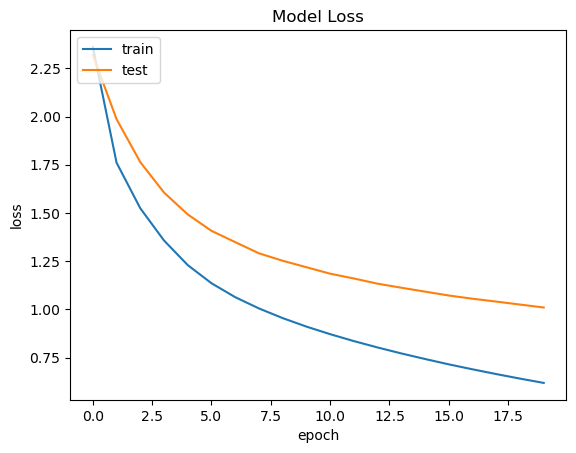

In [41]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
from keras.models import Model
from keras.optimizers import RMSprop
encoder_model = Model(encoder_inputs, encoder_states)
optimizer = RMSprop(learning_rate=0.001)  # Adjust as needed
encoder_model.compile(optimizer=optimizer, loss='categorical_crossentropy')
encoder_model.load_weights('seq2seq_eng-fra.keras')

In [46]:
decoder_state_input_h = Input(shape=(LSTM_NODES,))
decoder_state_input_c = Input(shape=(LSTM_NODES,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_inputs_single = Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)

In [47]:
decoder_outputs, h, c = decoder_lstm(decoder_inputs_single_x, initial_state=decoder_states_inputs)

In [48]:
decoder_states = [h, c]
decoder_outputs = decoder_dense(decoder_outputs)

In [49]:
decoder_model = Model(
    [decoder_inputs_single] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)

In [51]:
idx2word_input = {v:k for k, v in word2idx_inputs.items()}
idx2word_target = {v:k for k, v in word2idx_outputs.items()}

In [73]:
def translate_sentence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    output_sentence = []

    for _ in range(max_out_len):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        idx = np.argmax(output_tokens[0, 0, :])
        eos=idx
        if eos == idx:
            break

        word = ''

        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)

        target_seq[0, 0] = idx
        states_value = [h, c]

    return ' '.join(output_sentence)

In [90]:
i = np.random.choice(len(input_sentences))
input_seq = encoder_input_sequences[i:i+1]
translation = translate_sentence(input_seq)
print('English sentence : ', input_sentences[i])
print('French Translation : ', output_sentences[i])

1/1 [==============================] - 0s 19ms/step
English sentence :  Tom will know.
French Translation :  Tom le saura. 
